# Customer Segmentation using K-Nearest Neighbors

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
df=pd.read_csv("teleCust.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [3]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
#statistical analysis of dataset
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


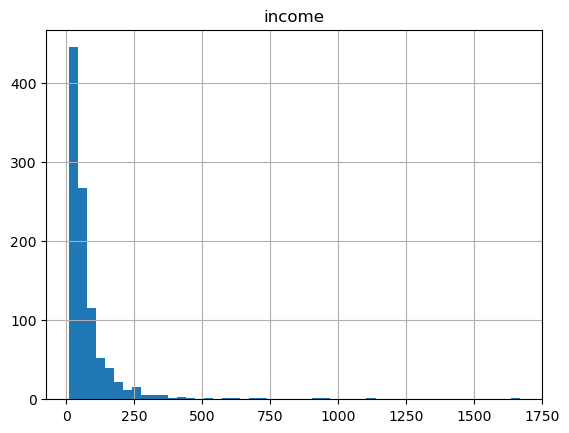

In [5]:
df.hist(column='income',bins=50);

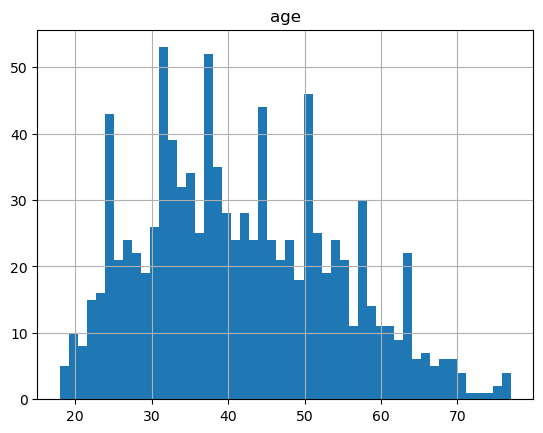

In [6]:
df.hist(column='age',bins=50);

In [7]:
df.marital.value_counts(normalize=True)*100

0    50.5
1    49.5
Name: marital, dtype: float64

In [8]:
#number of customers in groups
pd.DataFrame(df["custcat"].value_counts())

,custcat
3,281
1,266
4,236
2,217


281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

In [9]:
pd.DataFrame(df["custcat"].value_counts(normalize=True)*100)

,custcat
3,28.1
1,26.6
4,23.6
2,21.7


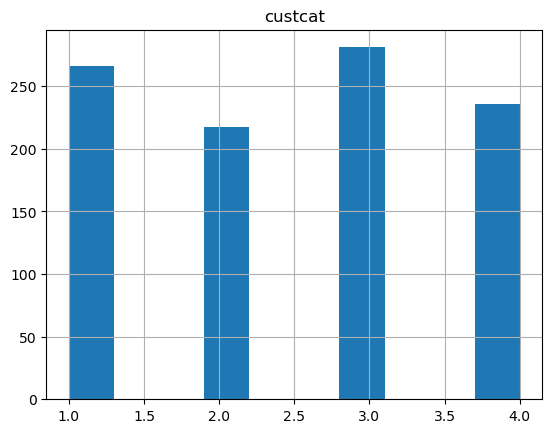

In [10]:
df.hist(column='custcat');

    Key Findings:
    1.Average age of our customer is approximately 42. 
    2.Average income is close to 78 units.
    3.Half of the customers are Single.
    4.Plus service has most number of subscribers followed by Basic service,Total service and E-service.

In [11]:
#converting dataframe to an array
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values
y=df[['custcat']].values

In [12]:
#data standardization
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [13]:
#train test split of dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


## K nearest neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#training model
k=4 #lets assume
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [16]:
#testing the model
y_hat=neigh.predict(x_test)

C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
#evaluation
from sklearn import metrics
print("Train set Accuracy : ",metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test set Accuracy : ",metrics.accuracy_score(y_test,y_hat))

Train set Accuracy :  0.5475
Test set Accuracy :  0.32


C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
#accuracy of KNN for different values of k
Ks=11
mean_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_hat=neigh.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test,y_hat)
    
mean_acc

C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 ])

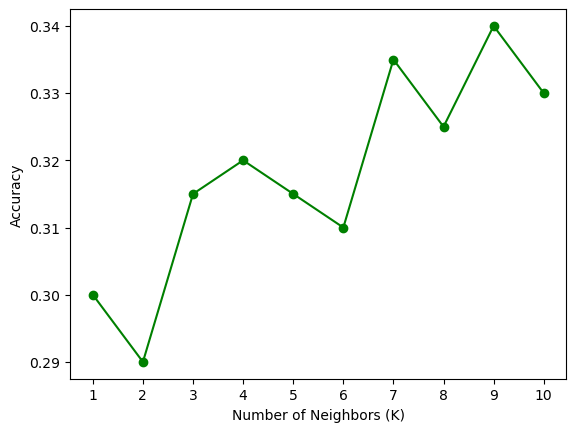

In [19]:
plt.plot(range(1,Ks),mean_acc,'o-g');
plt.xticks(range(1,Ks));
plt.xlabel("Number of Neighbors (K)");
plt.ylabel("Accuracy");

In [22]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was 0.34 with k= 9


### Test case

Lets consider a customer A with region=2,tenure=35,age=41,marital=1,address=11,income=77,ed=2,employ=11,retire=0,gender=0,reside=2 and predict suitable membership for A

In [23]:
A=[[2,35,41,1,11,77,2,11,0,0,2]]
pred=neigh.predict(A)

C:\Users\Happy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
pred[0]

4

Our imaginary customer A is likely to Subscribe service number 4 that is Total Service